Sentimen Analisis Konten Special Surabaya dan Journey To Annabelle oleh DMS

Install dan Import Library

In [22]:
# Library Standar
import re
import string
import csv
from io import StringIO

# Library NLP
import nltk
import textblob
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Library Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Library Word Embedding
from gensim.models import Word2Vec

# Library Visualisasi
import matplotlib.pyplot as plt

# Download Dataset yang Dibutuhkan
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data Gathering

In [2]:
data = pd.read_csv("komentar_youtube_dms.csv")
data.head(10)

,author,comment,likes
0,@mochibull,"Merinding nya kerasa sampe sini brook, geloo, ...",0
1,@AnisSuci-y7i,Saya orang Surabaya saya sering lewat rumah in...,0
2,@nurhaliza7192,nungguin yang di kalisosok nya kapan nyai😭,0
3,@fitri8282,duet sm ghost ranger kak,0
4,@GojakGojek-d3e,Kesini gara gara pesulap merah singgung inisia...,0
5,@zeusthemobilelegend4165,Siapa yg setuju mbak sarah kolaborasi sama ki ...,0
6,@Dai_houyu,Sumpah episode kali ini mual banget pengen mun...,0
7,@rizkyrobiatinnisa9941,haaaa gilaaa penasaran bgt apaan sih ibunya ma...,0
8,@irmawulandari9148,Saya download app dmsplus di tv android. Masuk...,0
9,@Rohaniflog,Hy kak sara aku penonton setia DMS.<br>Tanggap...,0


Data Preprocessing

In [3]:
# Membuat set berisi seluruh kata-kata tidak baku, typo, maupun slang words
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

# Membuat fungsi untuk memperbaiki kata-kata, mengembalikan hasil berupa kata yang telah diperbaiki
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [4]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # Menghapus RT
    text = re.sub(r"http\S+", '', text) # Menghapus link
    text = re.sub(r'[0-9]+', '', text) # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ') # Mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus semua tanda baca
    text = text.strip(' ') # Menghapus karakter spasi dari kiri dan kanan teks
    return text

# Mengubah semua karakter dalam teks menjadi huruf kecil
def casefoldingText(text):
    text = text.lower()
    return text

# Memecah atau membagi string, teks menjadi daftar token
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# Menghapus stopwords dalam teks
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))

    # List stopwords dapat ditambah lagi jika menemukan
    listStopwords.update(["aku", "kamu", "dia", "kami", "kita", "mereka", "ini", "itu", "sini", "situ", "sana",
    "iya", "tidak", "gak", "nggak", "loh", "deh", "dong", "aja", "nih", "de", "ke", "dan",
    "atau", "tapi", "karena", "jadi", "dengan", "untuk", "sebagai", "pada", "dari", "oleh",
    "nya", "lah", "si", "ga", "ya", "yaa", "na", "sih", "eh", "ku", "woi", "woii", "woy",
    "yuk", "br", "ulm", "mas", "mbak", "bro", "sis", "min", "enggak", "gw", "gue", "lu",
    "lo", "gua", "belum", "sudah", "udah", "emang", "kayak", "bukan", "mau", "apa",
    "ngga", "bisa", "gitu", "mungkin", "harus", "gimana", "lagi", "seperti", "malah",
    "kan", "sama", "seharusnya", "hanya", "bahwa", "tuh", "kok"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

# Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
def stemmingText(text):
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = " ".join(stemmed_words)

    return stemmed_text

# Mengubah daftar kata menjadi kalimat
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [5]:
# Membersihkan teks dan menyimpannya di kolom "text_clean"
data["text_clean"] = data["comment"].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di "text_casefoldingText"
data["text_casefoldingText"] = data["text_clean"].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di "text_slangwords"
data["text_slangwords"] = data["text_casefoldingText"].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di "text_tokenizingText"
data["text_tokenizingText"] = data["text_slangwords"].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di "text_stopword"
data["text_stopword"] = data["text_tokenizingText"].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di "text_akhir"
data["text_akhir"] = data["text_stopword"].apply(toSentence)

In [6]:
data.head(10)

,author,comment,likes,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,@mochibull,"Merinding nya kerasa sampe sini brook, geloo, ...",0,Merinding nya kerasa sampe sini brook geloo ba...,merinding nya kerasa sampe sini brook geloo ba...,merinding nya kerasa sampai sini brook geloo b...,"[merinding, nya, kerasa, sampai, sini, brook, ...","[merinding, kerasa, brook, geloo, kali, merind...",merinding kerasa brook geloo kali merinding
1,@AnisSuci-y7i,Saya orang Surabaya saya sering lewat rumah in...,0,Saya orang Surabaya saya sering lewat rumah in...,saya orang surabaya saya sering lewat rumah in...,saya orang surabaya saya sering lewat rumah in...,"[saya, orang, surabaya, saya, sering, lewat, r...","[orang, surabaya, rumah, inistiap, slalu, wani...",orang surabaya rumah inistiap slalu wanita ber...
2,@nurhaliza7192,nungguin yang di kalisosok nya kapan nyai😭,0,nungguin yang di kalisosok nya kapan nyai,nungguin yang di kalisosok nya kapan nyai,nungguin yang di kalisosok nya kapan nyai,"[nungguin, yang, di, kalisosok, nya, kapan, nyai]","[nungguin, kalisosok, nyai]",nungguin kalisosok nyai
3,@fitri8282,duet sm ghost ranger kak,0,duet sm ghost ranger kak,duet sm ghost ranger kak,duet sm ghost ranger kak,"[duet, sm, ghost, ranger, kak]","[duet, sm, ghost, ranger, kak]",duet sm ghost ranger kak
4,@GojakGojek-d3e,Kesini gara gara pesulap merah singgung inisia...,0,Kesini gara gara pesulap merah singgung inisia...,kesini gara gara pesulap merah singgung inisia...,kesini gara gara pesulap merah singgung inisia...,"[kesini, gara, gara, pesulap, merah, singgung,...","[kesini, gara, gara, pesulap, merah, singgung,...",kesini gara gara pesulap merah singgung inisia...
5,@zeusthemobilelegend4165,Siapa yg setuju mbak sarah kolaborasi sama ki ...,0,Siapa yg setuju mbak sarah kolaborasi sama ki ...,siapa yg setuju mbak sarah kolaborasi sama ki ...,siapa yang setuju mbak sarah kolaborasi sama k...,"[siapa, yang, setuju, mbak, sarah, kolaborasi,...","[setuju, sarah, kolaborasi, ki, prana, lewu, s...",setuju sarah kolaborasi ki prana lewu seru pen...
6,@Dai_houyu,Sumpah episode kali ini mual banget pengen mun...,0,Sumpah episode kali ini mual banget pengen mun...,sumpah episode kali ini mual banget pengen mun...,sumpah episode kali ini mual banget pengen mun...,"[sumpah, episode, kali, ini, mual, banget, pen...","[sumpah, episode, kali, mual, banget, pengen, ...",sumpah episode kali mual banget pengen muntah ...
7,@rizkyrobiatinnisa9941,haaaa gilaaa penasaran bgt apaan sih ibunya ma...,0,haaaa gilaaa penasaran bgt apaan sih ibunya ma...,haaaa gilaaa penasaran bgt apaan sih ibunya ma...,haaaa gilaaa penasaran banget apa sih ibunya m...,"[haaaa, gilaaa, penasaran, banget, apa, sih, i...","[haaaa, gilaaa, penasaran, banget, ibunya, dav...",haaaa gilaaa penasaran banget ibunya daviiidd
8,@irmawulandari9148,Saya download app dmsplus di tv android. Masuk...,0,Saya download app dmsplus di tv android Masuki...,saya download app dmsplus di tv android masuki...,saya download app dmsplus di tv android masukk...,"[saya, download, app, dmsplus, di, tv, android...","[download, app, dmsplus, tv, android, masukkan...",download app dmsplus tv android masukkan email...
9,@Rohaniflog,Hy kak sara aku penonton setia DMS.<br>Tanggap...,0,Hy kak sara aku penonton setia DMSbrTanggapan ...,hy kak sara aku penonton setia dmsbrtanggapan ...,hy kak sara aku penonton setia dmsbrtanggapan ...,"[hy, kak, sara, aku, penonton, setia, dmsbrtan...","[hy, kak, sara, penonton, setia, dmsbrtanggapa...",hy kak sara penonton setia dmsbrtanggapan kak ...


In [7]:
# Mendefinisikan subjektivitas untuk menilai tingkat subjektivitas pada komentar
def subjektivitas(tr_text):
    return TextBlob(tr_text).sentiment.subjectivity

# Mendefinisikan polaritas untuk menilai tingkat polaritas pada komentar
def polaritas(tr_text):
    return TextBlob(tr_text).sentiment.polarity

# Mendefinisikan hasil sentimen untuk memberikan label pada komentar
def hasilSentimen(nilai):
    if nilai < 0:
        return "negatif"
    elif nilai > 0:
        return "positif"
    else:
        return "netral"

# Menambahkan kolom subjektivitas dengan mengaplikasikan fungsi subjektivitas
data["subjektivitas"] = data["text_akhir"].apply(subjektivitas)

# Menambahkan kolom polaritas dengan mengaplikasikan fungsi polaritas
data["polaritas"] = data["text_akhir"].apply(polaritas)

# Menambahkan kolom sentimen dengan mengaplikasikan fungsi hasil sentimen
data["sentimen"] = data["polaritas"].apply(hasilSentimen)

# Menampilkan 5 baris pertama data setelah diaplikasikan seluruh fungsi
data.head()


,author,comment,likes,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,subjektivitas,polaritas,sentimen
0,@mochibull,"Merinding nya kerasa sampe sini brook, geloo, ...",0,Merinding nya kerasa sampe sini brook geloo ba...,merinding nya kerasa sampe sini brook geloo ba...,merinding nya kerasa sampai sini brook geloo b...,"[merinding, nya, kerasa, sampai, sini, brook, ...","[merinding, kerasa, brook, geloo, kali, merind...",merinding kerasa brook geloo kali merinding,0.0,0.0,netral
1,@AnisSuci-y7i,Saya orang Surabaya saya sering lewat rumah in...,0,Saya orang Surabaya saya sering lewat rumah in...,saya orang surabaya saya sering lewat rumah in...,saya orang surabaya saya sering lewat rumah in...,"[saya, orang, surabaya, saya, sering, lewat, r...","[orang, surabaya, rumah, inistiap, slalu, wani...",orang surabaya rumah inistiap slalu wanita ber...,0.0,0.0,netral
2,@nurhaliza7192,nungguin yang di kalisosok nya kapan nyai😭,0,nungguin yang di kalisosok nya kapan nyai,nungguin yang di kalisosok nya kapan nyai,nungguin yang di kalisosok nya kapan nyai,"[nungguin, yang, di, kalisosok, nya, kapan, nyai]","[nungguin, kalisosok, nyai]",nungguin kalisosok nyai,0.0,0.0,netral
3,@fitri8282,duet sm ghost ranger kak,0,duet sm ghost ranger kak,duet sm ghost ranger kak,duet sm ghost ranger kak,"[duet, sm, ghost, ranger, kak]","[duet, sm, ghost, ranger, kak]",duet sm ghost ranger kak,0.0,0.0,netral
4,@GojakGojek-d3e,Kesini gara gara pesulap merah singgung inisia...,0,Kesini gara gara pesulap merah singgung inisia...,kesini gara gara pesulap merah singgung inisia...,kesini gara gara pesulap merah singgung inisia...,"[kesini, gara, gara, pesulap, merah, singgung,...","[kesini, gara, gara, pesulap, merah, singgung,...",kesini gara gara pesulap merah singgung inisia...,0.0,0.0,netral


In [24]:
# Menghitung jumlah masing-masing sentimen
data["sentimen"].value_counts()

sentimen
netral     20798
positif     1135
negatif      140
Name: count, dtype: int64

Text(0.5, 1.0, 'Persentase Masing-Masing Sentimen')

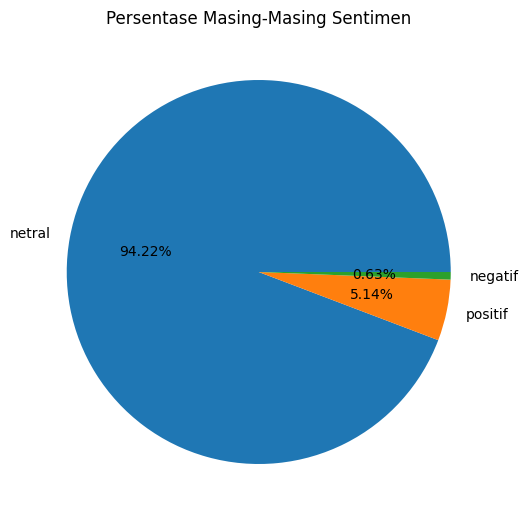

In [8]:
# Menghitung jumlah masing-masing sentimen
data["sentimen"].value_counts()
diagram = data["sentimen"].value_counts().rename_axis("nilai_sentimen").reset_index(name="jumlah")
label = diagram.nilai_sentimen
nilai = diagram.jumlah

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis = ("equal")

# Membentuk pie plot untuk menampilkan persentase masing-masing sentimen
ax.pie(nilai, labels=label, autopct="%1.2f%%")
ax.set_title("Persentase Masing-Masing Sentimen")

Dari hasil di atas, dapat dilihat bahwa sentimen netral berjumlah 20,798 atau sekitar 94.22% dari total, sentimen positif berjumlah 1,135 atau sekitar 5.14% dari total, dan sentimen negatif berjumlah 140 atau sekitar 0.63% dari total. Selanjutnya, kita akan menyimpan dataset yang telah diberi label.

In [9]:
# Menyimpan dataset yang telah diberi label dalam file csv baru
data.to_csv("komen_dms_berlabel.csv", encoding="utf8", index=False)

Data Processing dan Ekstraksi Fitur

Setelah data di preproses, kita akan memproses data untuk pelatihan model machine learning dan deep learning. Karena jumlah komentar positif dan negatif jauh lebih sedikit dibanding komentar netral, maka kita akan melakukan oversampling data untuk keduanya. Pada proyek ini, komentar positif dan negatif akan dioversampling sehingga jumlahnya menjadi 20798 baris.

In [10]:
# Mendefinisikan jumlah target baris untuk setiap sentimen berdasarkan jumlah komentar netral
target_num = data[data["sentimen"] == "netral"].shape[0]  # Jumlah netral sebagai acuan (20806)

# Menghitung jumlah baris pada setiap kategori sentimen yang ada
current_counts = data["sentimen"].value_counts()

# Menghitung jumlah tambahan baris komentar yang diperlukan untuk masing-masing kategori
num_additional_positif = target_num - current_counts["positif"]
num_additional_negatif = target_num - current_counts["negatif"]

# Melakukan oversampling pada sentimen positif dan negatif
additional_positif_samples = data[data["sentimen"] == "positif"].sample(num_additional_positif, replace=True)
additional_negatif_samples = data[data["sentimen"] == "negatif"].sample(num_additional_negatif, replace=True)

# Menggabungkan data asli dengan data oversampling
balanced_data = pd.concat([data, additional_positif_samples, additional_negatif_samples], ignore_index=True)

# Menampilkan jumlah masing-masing sentimen setelah dilakukan oversampling
print("Jumlah masing-masing sentimen setelah oversampling:")
print(balanced_data["sentimen"].value_counts())

Jumlah masing-masing sentimen setelah oversampling:
sentimen
netral     20798
positif    20798
negatif    20798
Name: count, dtype: int64


Setelah dilakukan oversampling, terlihat bahwa jumlah data pada masing-masing sentimen sudah sama. Selanjutnya, kita akan melakukan ekstraksi fitur pada dataset menggunakan TF-IDF

In [11]:
# Memisahkan data menjadi fitur (comment) dan label (sentimen)
X = balanced_data["comment"]
y = balanced_data["sentimen"]

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, min_df=20, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


In [12]:
# Pembagian data 80/20
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Pemodelan

Pelatihan: SVM,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20

In [13]:
# Model pelatihan: SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluasi model
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print("SVM with TF-IDF - accuracy_train:", accuracy_train_svm)
print("SVM with TF-IDF - accuracy_test:", accuracy_test_svm)

SVM with TF-IDF - accuracy_train: 0.9983972753681258
SVM with TF-IDF - accuracy_test: 0.9982370382242167


Pelatihan: RF,    Ekstraksi Fitur: Word2Vec,    Pembagian Data: 80/20

In [14]:
# Ekstraksi fitur menggunakan Word2Vec
sentences = [komentar.split() for komentar in X]
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Representasi setiap komentar dengan rata-rata vektor kata
X_word2vec = np.array([
    np.mean([word2vec.wv[word] for word in komentar.split() if word in word2vec.wv], axis=0)
    if any(word in word2vec.wv for word in komentar.split()) else np.zeros(100)
    for komentar in X
])

# Pembagian data 80/20
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# Model pelatihan: Random Forest
rf_word2vec_model = RandomForestClassifier(random_state=42)
rf_word2vec_model.fit(X_train, y_train)  # Perbaikan: Gunakan X_train dan y_train

# Evaluasi model
y_pred_train_rf = rf_word2vec_model.predict(X_train)
y_pred_test_rf = rf_word2vec_model.predict(X_test)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print("Random Forest with Word2Vec - accuracy_train:", accuracy_train_rf)
print("Random Forest with Word2Vec - accuracy_test:", accuracy_test_rf)

Random Forest with Word2Vec - accuracy_train: 1.0
Random Forest with Word2Vec - accuracy_test: 0.9994390576167962


Pelatihan: RF,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 70/30 

In [15]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)  # Konversi teks ke vektor TF-IDF

# Pembagian data 70/30
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Training model Random Forest untuk TF-IDF
rf_tfidf_model = RandomForestClassifier(random_state=42)
rf_tfidf_model.fit(X_train, y_train)  # Gunakan X_train yang benar

# Evaluasi model
y_pred_train_rf = rf_tfidf_model.predict(X_train)
y_pred_test_rf = rf_tfidf_model.predict(X_test)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print("Random Forest with TF-IDF - accuracy_train:", accuracy_train_rf)
print("Random Forest with TF-IDF - accuracy_test:", accuracy_test_rf)

Random Forest with TF-IDF - accuracy_train: 1.0
Random Forest with TF-IDF - accuracy_test: 0.9995192050857418


Deep Learning LSTM Model

In [16]:
# Model LSTM
embedding_dim = 128
lstm_model = Sequential([
    Embedding(input_dim=len(tfidf.vocabulary_), output_dim=embedding_dim, input_length=X_tfidf.shape[1]),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train.toarray(), y_train.factorize()[0], epochs=1, batch_size=32, validation_split=0.2)
loss, accuracy = lstm_model.evaluate(X_test.toarray(), y_test.factorize()[0])
print(f"LSTM Accuracy: {accuracy}")


c:\Users\victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1092/1092 ━━━━━━━━━━━━━━━━━━━━ 32118s 29s/step - accuracy: 0.3361 - loss: 1.0996 - val_accuracy: 0.3315 - val_loss: 1.0986
585/585 ━━━━━━━━━━━━━━━━━━━━ 1938s 3s/step - accuracy: 0.3343 - loss: 1.0986
LSTM Accuracy: 0.3305732011795044


Model LSTM memiliki akurasi rendah (~33%) pada data latih dan uji dengan loss yang hampir sama (1.0986), menunjukkan bahwa model tidak belajar pola yang signifikan dan kinerjanya sebanding dengan tebakan acak.

Deep Leaning CNN Model

In [17]:
# Model CNN
cnn_model = Sequential([
    Embedding(input_dim=len(tfidf.vocabulary_), output_dim=embedding_dim, input_length=X_tfidf.shape[1]),
    Conv1D(128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train.toarray(), y_train.factorize()[0], epochs=1, batch_size=32, validation_split=0.2)
loss, accuracy = cnn_model.evaluate(X_test.toarray(), y_test.factorize()[0])
print(f"CNN Accuracy: {accuracy}")

c:\Users\victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1092/1092 ━━━━━━━━━━━━━━━━━━━━ 8270s 8s/step - accuracy: 0.3358 - loss: 2.5134 - val_accuracy: 0.3366 - val_loss: 1.0986
585/585 ━━━━━━━━━━━━━━━━━━━━ 225s 385ms/step - accuracy: 0.3321 - loss: 1.0987
CNN Accuracy: 0.3318019211292267


Model CNN memiliki akurasi rendah (~33%) pada data latih dan uji dengan loss yang tidak signifikan berubah (~1.0986), menunjukkan model tidak mampu mempelajari pola data dan kinerjanya setara dengan tebakan acak.

Inference Function

Karena akurasi yang dihasilkan oleh deep learning model LSTM dan model CNN sangat rendah, sebagai contoh disini kita menggunakan SVM untuk memprediksi sentimennya.

In [30]:
# Mendefinisikan mapping untuk menampilkan output klasifikasi sentimen
label_mapping = {"positif": "Positif", "netral": "Netral", "negatif": "Negatif"}

def preprocess_input(text, tfidf_vectorizer):
    """Preprocess the input text to match the training data preprocessing."""
    text_tokenized = word_tokenize(text)  # Tokenisasi
    text_transformed = tfidf_vectorizer.transform([" ".join(text_tokenized)])  # Gunakan transform bukan fit_transform
    return text_transformed

def predict_sentiment(text, model, tfidf_vectorizer):
    """Predict the sentiment of the given text using the trained model."""
    # Preproses teks input langsung
    preprocessed_text = preprocess_input(text, tfidf_vectorizer)

    # Memastikan teks memiliki ukuran yang sesuai
    preprocessed_text_array = preprocessed_text.toarray()

    # Membuat prediksi teks
    prediction = model.predict(preprocessed_text_array)

    # Memprediksi teks ke sentimen yang sesuai
    predicted_sentiment = label_mapping[prediction[0]]

    return predicted_sentiment

# Memberikan input pada pengguna untuk memasukkan teks untuk diuji
input_text = input("Masukkan Teks: ")
print("Teks yang dimasukkan adalah:", input_text)
predicted_sentiment = predict_sentiment(input_text, svm_model, tfidf)
print(f"Predicted Sentiment: {predicted_sentiment}")


Teks yang dimasukkan adalah: Video penelusuran DMS kali ini sangat seru dan mengerikan
Predicted Sentiment: Netral
